<hr/>

# Data Mining
**Cong Mu** <br/>

<hr/>

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn import datasets
import pandas as pd

In [3]:
# Load the dataset
iris = datasets.load_iris()
X = iris.data     # use all 4 features (sepal length, sepal width, petal length, petal width)
c = iris.target   # 3 classes (0,1,2)

### KNN

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn = pd.DataFrame()   # save the result

for k in range(1,11):
    
    # Try k = 1,2,...,10 using uniform weight which means all points in each neighborhood are weighted equally
    # parameter[n_neighbors] contorls the k, parameter[weights] contorls the weighting method
    # other parameters (with default):
    # algorithm=’auto’, controls algorithm used to compute the nearest neighbors, ‘auto’ will choose the most appropriate algorithm based on the values passed to fit method
    # leaf_size=30, leaf size when setting algorithm='ball_tree' or 'kd_tree'
    # p=2, power parameter for the Minkowski metric, using 2 is equivalent to euclidean_distance
    # metric=’minkowski’, the distance metric used for the tree
    # metric_params=None, additional keyword arguments for the metric function
    # n_jobs=1, the number of parallel jobs to run for neighbors search
    model1 = KNeighborsClassifier(n_neighbors=k, weights='uniform')  
    
    # weighting points by the inverse of their distance, others same as above
    model2 = KNeighborsClassifier(n_neighbors=k, weights='distance')  
    
    # Use 10-fold cross-validation and take the mean to evaluate the model
    # paramater[cv] contorls the split of the data, cv=k means k-fold cross-validation
    # other paramenters (with default): 
    # estimator, the method used to fit the data
    # X, the data to fit
    # y=None, the target variable to predict in supervised learning.
    # groups=None, group labels for the samples used while splitting the dataset into train/test set
    # n_jobs=1, the number of CPUs used to do the computation
    # fit_params=None, parameters passed to the fit method of the estimator
    # pre_dispatch=‘2*n_jobs’, the number of jobs dispatched during parallel execution
    cvscores1 = cross_val_score(model1, X, c, cv=10)
    cvscores2 = cross_val_score(model2, X, c, cv=10)
    
    # Use dataframe to save the result
    knn = knn.append(pd.DataFrame(data=[[k, 'uniform', cvscores1.mean()]], columns=['k','weights', '10-fold CV score']))
    knn = knn.append(pd.DataFrame(data=[[k, 'distance', cvscores2.mean()]], columns=['k','weights', '10-fold CV score']))

knn.index = arange(1,21)
knn

,k,weights,10-fold CV score
1,1,uniform,0.960000
2,1,distance,0.960000
3,2,uniform,0.953333
4,2,distance,0.960000
5,3,uniform,0.966667
6,3,distance,0.966667
7,4,uniform,0.966667
8,4,distance,0.966667
9,5,uniform,0.966667
10,5,distance,0.966667


It seems like the scores increases with k increasing and distance weight seems to do a better job than uniform weight.

<br>
<br>

### Gaussian Naive Bayes

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# priors=None, controls prior probabilities of the classes, if not specified will be adjusted according to the data
model = GaussianNB()

# Use 10-fold cross-validation and take the mean to evaluate the model
# paramater[cv] contorls the split of the data, cv=k means k-fold cross-validation
# other parameters same as explained in KNN
cvscores = cross_val_score(model, X, c, cv=10)

print('Model: Gaussian Naive Bayes', '\t', '10-fold cross-validation score: ', cvscores.mean())

Model: Gaussian Naive Bayes 	 10-fold cross-validation score:  0.953333333333


The result seems to be less satisfying compared with KNN.

<br>
<br>

### Quadratic Discriminant Analysis

In [6]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.model_selection import cross_val_score

# priors=None, priors on classes
# reg_param=0.0, regularizes the covariance estimate as (1-reg_param)*Sigma + reg_param*np.eye(n_features)
# store_covariance=False, if True the covariance matrices are computed and stored in the self.covariance_ attribute
# tol=0.0001, threshold used for rank estimation.
model = QDA()

# Use 10-fold cross-validation and take the mean to evaluate the model
# paramater[cv] contorls the split of the data, cv=k means k-fold cross-validation
# other parameters same as explained in KNN
cvscores = cross_val_score(model, X, c, cv=10)

print('Model: Quadratic Discriminant Analysis', '\t', '10-fold cross-validation score: ', cvscores.mean())

Model: Quadratic Discriminant Analysis 	 10-fold cross-validation score:  0.98


The result seems to be better than KNN and Gaussian Naive Bayes.

<br>
<br>

### Decision Tree

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

tree = pd.DataFrame()   # save the result 

for depth in range(1,11):
    
    # Try max depth of the tree = 1,2,...,10 
    # criterion=’gini’, function to measure the quality of a split, 'gini' for the Gini impurity
    # splitter=’best’, strategy used to choose the split at each node
    # min_samples_split=2, minimum number of samples required to split an internal node
    # min_samples_leaf=1, minimum number of samples required to be at a leaf node
    # min_weight_fraction_leaf=0.0, minimum weighted fraction of the sum total of weights required to be at a leaf node
    # max_features=None, number of features to consider when looking for the best split
    # max_leaf_nodes=None, grow a tree with max_leaf_nodes in best-first fashion.
    # min_impurity_decrease=0.0, threshold to split the node
    # min_impurity_split=None, threshold for early stopping in tree growth
    model = DecisionTreeClassifier(max_depth=depth)
    
    # Use 10-fold cross-validation and take the mean to evaluate the model
    # paramater[cv] contorls the split of the data, cv=k means k-fold cross-validation
    # other parameters same as explained in KNN
    cvscores = cross_val_score(model, X, c, cv=10)
    
    # Use dataframe to save the result
    tree = tree.append(pd.DataFrame(data=[[depth, cvscores.mean()]], columns=['depth', '10-fold CV score']))
    
tree.index = arange(1,11)
tree

,depth,10-fold CV score
1,1,0.666667
2,2,0.953333
3,3,0.960000
4,4,0.953333
5,5,0.960000
6,6,0.960000
7,7,0.960000
8,8,0.953333
9,9,0.953333
10,10,0.960000


It seems that a deeper tree does not necessarily guarantee a better performance.

<br>
<br>

### Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = pd.DataFrame()   # save the result 

for n in range(10,60,10):
    for depth in range(1,6):
        for criterion in ['gini','entropy']:
            
            if criterion == 'gini':
                count = 1
            else:
                count = 2      
            
            # Try the number of tree = 10,20,...,50, the max depth of each tree = 1,2,...,5, 
            # the criterion used in spliting the data at nodes = 'gini' or 'entropy'
            # most of other important parameters are the same as Decision Tree
            model = RandomForestClassifier(n_estimators=n, max_depth=depth, criterion=criterion, random_state=n+depth+count)
            
            # Use 10-fold cross-validation and take the mean to evaluate the model
            # paramater[cv] contorls the split of the data, cv=k means k-fold cross-validation
            # other parameters same as explained in KNN
            cvscores = cross_val_score(model, X, c, cv=10)
    
            # Use dataframe to save the result
            rf = rf.append(pd.DataFrame(data=[[n, depth, criterion, cvscores.mean()]], columns=['number of trees','depth', 'criterion', '10-fold CV score']))
    
rf.index = arange(1,51)
rf

,number of trees,depth,criterion,10-fold CV score
1,10,1,gini,0.960000
2,10,1,entropy,0.786667
3,10,2,gini,0.960000
4,10,2,entropy,0.960000
5,10,3,gini,0.960000
6,10,3,entropy,0.953333
7,10,4,gini,0.953333
8,10,4,entropy,0.953333
9,10,5,gini,0.953333
10,10,5,entropy,0.966667


It seems gini criterion does a better job than entropy criterion in general. Also neither the more trees in the forest nor the deeper depth in each tree will guarantee a better performance.

<br>
<br>

### Run PCA and keep the top 3 components, whiten the data, and repeat the above experiments

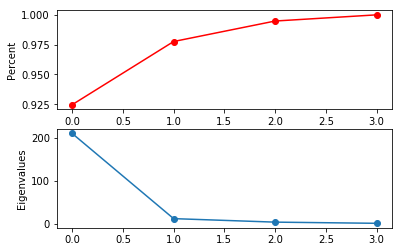

In [9]:
# First explore the data

# Center the data
centeredX = X - np.mean(X,axis=0)[np.newaxis,:]

# Use SVD to compute eigenvectors and eigenvalues
U, W, V = np.linalg.svd(centeredX)

# Eigenvectors
E = U

# Eigenvalues 
L = W**2 / (centeredX.shape[1] - 1)

# Look at how many percent can different PCs explain for the data
S = np.cumsum(L)
R = S / S[-1]

subplot(211);
plt.plot(R,'ro-');
ylabel('Percent');
subplot(212);
plt.plot(L,'o-'); 
ylabel('Eigenvalues');

It seems that first 3 PCs can explain more than 97.5% of the data.

In [10]:
from sklearn.decomposition import PCA

# Choose first 3 PCs by setting [n_componts] = 3 and whitening the data by setting [whiten] = True
pca = PCA(n_components=3, whiten=True)
pca.fit(X);

# Repeat the above experiments using new XX which is transformed by PCA
XX = pca.fit_transform(X)

In [11]:
# KNN
# Annotations same as before, just use XX to replace X

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn2 = pd.DataFrame()   

for k in range(1,11):
    
    model1 = KNeighborsClassifier(n_neighbors=k, weights='uniform')  
    model2 = KNeighborsClassifier(n_neighbors=k, weights='distance')  
    
    cvscores1 = cross_val_score(model1, XX, c, cv=10)
    cvscores2 = cross_val_score(model2, XX, c, cv=10)
    
    knn2 = knn2.append(pd.DataFrame(data=[[k, 'uniform', cvscores1.mean()]], columns=['k','weights', '10-fold CV score']))
    knn2 = knn2.append(pd.DataFrame(data=[[k, 'distance', cvscores2.mean()]], columns=['k','weights', '10-fold CV score']))

knn2.index = arange(1,21)
knn2

,k,weights,10-fold CV score
1,1,uniform,0.906667
2,1,distance,0.906667
3,2,uniform,0.900000
4,2,distance,0.906667
5,3,uniform,0.913333
6,3,distance,0.913333
7,4,uniform,0.913333
8,4,distance,0.913333
9,5,uniform,0.913333
10,5,distance,0.913333


In [12]:
# Gaussian Naive Bayes
# Annotations same as before, just use XX to replace X

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

model = GaussianNB()

cvscores = cross_val_score(model, XX, c, cv=10)

print('Model: Gaussian Naive Bayes', '\t', '10-fold cross-validation score: ', cvscores.mean())

Model: Gaussian Naive Bayes 	 10-fold cross-validation score:  0.906666666667


In [13]:
# Quadratic Discriminant Analysis
# Annotations same as before, just use XX to replace X

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.model_selection import cross_val_score

model = QDA()

cvscores = cross_val_score(model, XX, c, cv=10)

print('Model: Quadratic Discriminant Analysis', '\t', '10-fold cross-validation score: ', cvscores.mean())

Model: Quadratic Discriminant Analysis 	 10-fold cross-validation score:  0.966666666667


In [14]:
# Decision Tree
# Annotations same as before, just use XX to replace X

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

tree2 = pd.DataFrame()   

for depth in range(1,11):
    
    model = DecisionTreeClassifier(max_depth=depth)
    
    cvscores = cross_val_score(model, XX, c, cv=10)
    
    tree2 = tree2.append(pd.DataFrame(data=[[depth, cvscores.mean()]], columns=['depth', '10-fold CV score']))
    
tree2.index = arange(1,11)
tree2

,depth,10-fold CV score
1,1,0.666667
2,2,0.933333
3,3,0.926667
4,4,0.926667
5,5,0.946667
6,6,0.946667
7,7,0.926667
8,8,0.940000
9,9,0.933333
10,10,0.946667


In [15]:
# Random Forest
# Annotations same as before, just use XX to replace X

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf2 = pd.DataFrame()   

for n in range(10,60,10):
    for depth in range(1,6):
        for criterion in ['gini','entropy']:
            
            if criterion == 'gini':
                count = 1
            else:
                count = 2      
            
            model = RandomForestClassifier(n_estimators=n, max_depth=depth, criterion=criterion, random_state=n+depth+count)
            
            cvscores = cross_val_score(model, XX, c, cv=10)
    
            rf2 = rf2.append(pd.DataFrame(data=[[n, depth, criterion, cvscores.mean()]], columns=['number of trees','depth', 'criterion', '10-fold CV score']))
    
rf2.index = arange(1,51)
rf2

,number of trees,depth,criterion,10-fold CV score
1,10,1,gini,0.786667
2,10,1,entropy,0.740000
3,10,2,gini,0.866667
4,10,2,entropy,0.760000
5,10,3,gini,0.820000
6,10,3,entropy,0.933333
7,10,4,gini,0.940000
8,10,4,entropy,0.913333
9,10,5,gini,0.920000
10,10,5,entropy,0.900000


It seems all socres decrease when using the transformed data by PCA.

<br>
<br>

### Summary

In [16]:
# Compare all the results

bestKNN = knn['10-fold CV score'].max()
bsetGBN = cross_val_score(GaussianNB(), X, c, cv=10).mean()
bestQDA = cross_val_score(QDA(), X, c, cv=10).mean()
bestTree = tree['10-fold CV score'].max()
bestRF = rf['10-fold CV score'].max()

bestKNN2 = knn2['10-fold CV score'].max()
bsetGBN2 = cross_val_score(GaussianNB(), XX, c, cv=10).mean()
bestQDA2 = cross_val_score(QDA(), XX, c, cv=10).mean()
bestTree2 = tree2['10-fold CV score'].max()
bestRF2 = rf2['10-fold CV score'].max()

allresult = pd.DataFrame({'scores_Original': [bestKNN,bsetGBN,bestQDA,bestTree,bestRF], 'scores_PCA': [bestKNN2,bsetGBN2,bestQDA2,bestTree2,bestRF2]}, index=['KNN','GNB','QDA','Tree','RF'])
allresult

,scores_Original,scores_PCA
KNN,0.973333,0.926667
GNB,0.953333,0.906667
QDA,0.980000,0.966667
Tree,0.960000,0.946667
RF,0.966667,0.946667


Based on the 10-fold cross-validation scores, it seems that QDA has the best performence. Maybe it becauses that QDA considers the relation between the 4 features by using the covariance of features. Since the 4 features sepal length, sepal width, petal length and petal width should be related more or less given their meaning. 

<br>
<br>